In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

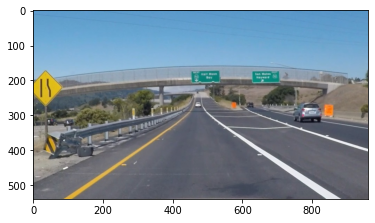

In [2]:
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)

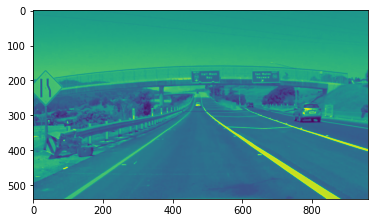

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [279]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

In [280]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [281]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

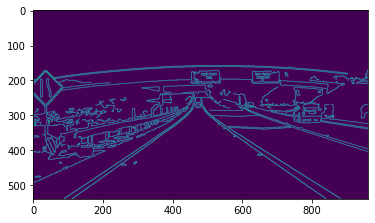

In [282]:
plt.imshow(edges)

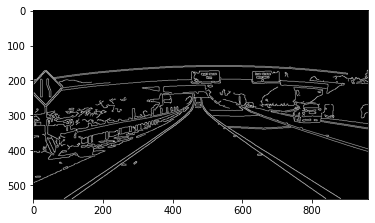

In [283]:
plt.imshow(edges, cmap='Greys_r')

In [284]:
mask = np.zeros_like(edges)
type(mask), mask.shape, mask

(numpy.ndarray,
 (540, 960),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

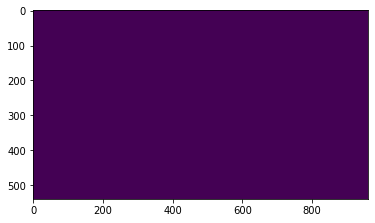

In [285]:
plt.imshow(mask)

In [286]:
ignore_mask_color = 255

In [287]:
imshape = image.shape
imshape

(540, 960, 3)

In [288]:
# vertices = np.array([[(0, imshape[0]), (0, 0), (imshape[1], 0), (imshape[1], imshape[0])]], dtype=np.int32)

vertices = np.array([[(0, imshape[0]), (460, 280), (500, 280), (imshape[1], imshape[0])]], dtype=np.int32)

vertices

array([[[  0, 540],
        [460, 280],
        [500, 280],
        [960, 540]]], dtype=int32)

In [289]:
cv2.fillPoly(mask, vertices, ignore_mask_color)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

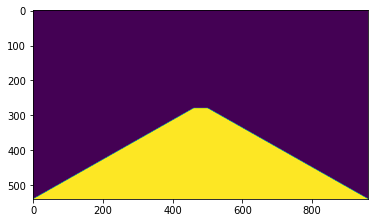

In [290]:
plt.imshow(mask)

In [291]:
masked_edges = cv2.bitwise_and(edges, mask)
masked_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

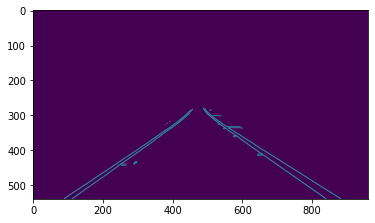

In [292]:
plt.imshow(masked_edges)

In [293]:
np.pi

3.141592653589793

In [294]:
# rho = 1
# theta = np.pi / 180
# threshold = 1
# min_line_length = 5
# max_line_gap = 1

rho = 1
theta = np.pi / 180
threshold = 5
min_line_length = 30
max_line_gap = 3

# rho = 2
# theta = np.pi / 180
# threshold = 15
# min_line_length = 40
# max_line_gap = 20

In [306]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
lines.shape

(18, 1, 4)

In [307]:
lines

array([[[386, 344, 435, 307]],

       [[567, 341, 881, 538]],

       [[631, 382, 880, 538]],

       [[113, 538, 245, 445]],

       [[526, 319, 622, 387]],

       [[ 89, 539, 412, 321]],

       [[273, 424, 369, 356]],

       [[586, 362, 838, 539]],

       [[243, 445, 309, 400]],

       [[521, 315, 559, 342]],

       [[187, 474, 360, 357]],

       [[569, 342, 633, 382]],

       [[776, 494, 828, 531]],

       [[ 90, 538, 129, 511]],

       [[239, 448, 272, 426]],

       [[374, 346, 408, 323]],

       [[184, 487, 222, 461]],

       [[747, 474, 778, 496]]], dtype=int32)

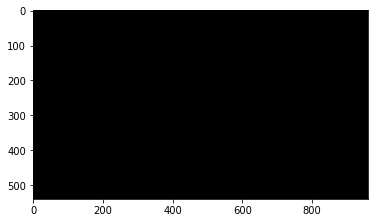

In [296]:
line_image = np.copy(image) * 0
plt.imshow(line_image)

In [297]:
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

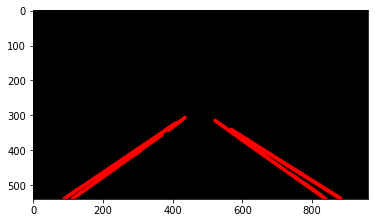

In [298]:
plt.imshow(line_image)

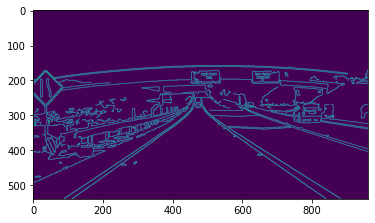

In [299]:
plt.imshow(edges)

In [300]:
color_edges = np.dstack((edges, edges, edges))

In [301]:
type(color_edges), color_edges.shape

(numpy.ndarray, (540, 960, 3))

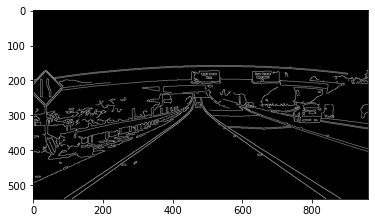

In [302]:
plt.imshow(color_edges)

In [303]:
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

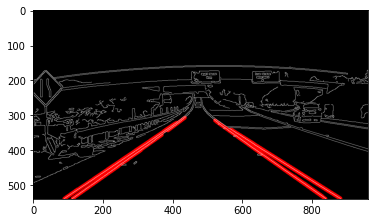

In [304]:
plt.imshow(lines_edges)